
## Loan Application Status Prediction
### Problem Statement:
    This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

    Independent Variables:

    - Loan_ID

    - Gender

    - Married

    - Dependents

    - Education

    - Self_Employed

    - ApplicantIncome

    - CoapplicantIncome

    - Loan_Amount

    - Loan_Amount_Term

    - Credit History

    - Property_Area

    Dependent Variable (Target Variable):

    - Loan_Status

    You have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset. 

    


#### DATA PREPARATION:
    - Importing data.
    - checking data for null values and irregularities if any.
    - Understanding Data.

In [1283]:
#importing imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb


In [1284]:
#Loading Data

train = pd.read_csv('loan_prediction.csv')


In [1285]:
#Reading Data


train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [1286]:
#Checknig information about Data like STD, min, max mean values.

train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


#### OBSERVATIONS:
    - Applicant Income/ Coapplicants/ loan amount mean and 50% quantile and median has high difference, Skewness observed.
    

In [1287]:
# Checking unique values and thier counts in all the features categorcial and continous.

for i in train.columns:
    print(train[i].value_counts())

LP002036    1
LP002318    1
LP001788    1
LP002368    1
LP002082    1
           ..
LP001002    1
LP002100    1
LP002634    1
LP002187    1
LP002110    1
Name: Loan_ID, Length: 614, dtype: int64
Male      489
Female    112
Name: Gender, dtype: int64
Yes    398
No     213
Name: Married, dtype: int64
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
No     500
Yes     82
Name: Self_Employed, dtype: int64
2500    9
4583    6
2600    6
6000    6
5000    5
       ..
5818    1
5819    1
5821    1
2750    1
3691    1
Name: ApplicantIncome, Length: 505, dtype: int64
0.0       273
1666.0      5
2083.0      5
2500.0      5
1750.0      3
         ... 
7166.0      1
2138.0      1
2166.0      1
3541.0      1
3021.0      1
Name: CoapplicantIncome, Length: 287, dtype: int64
120.0    20
110.0    17
100.0    15
187.0    12
160.0    12
         ..
570.0     1
300.0     1
376.0     1
117.0     1
311.0     1
Name: L

#### OBSERVATIONS: 
    - Gender,Married,Dependants,Education,Self_Employeed,Credit_History, property_Area, are Categorical Features, 7 Categorical Features.
    - Income/ loan Amount,Loan_amount Term are 4 Continous Features.
    
    - Target variable is Categorical , Binary Classification (2 target Labels).
    
    
    - WE can drop ID, as it unique identifier of each row.

<AxesSubplot:>

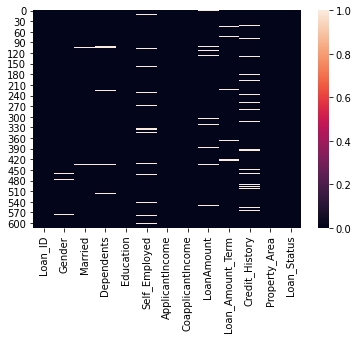

In [1288]:
### Checking null values.


sb.heatmap(train.isnull())

#### OBSERVATIONS:
    -- many missing vlaues present, we can fill it with mode for categorical data and median for continous data.

### EDA: Vizualization of data.

In [1289]:
train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [1290]:
import warnings
warnings.filterwarnings('ignore')

([<matplotlib.axis.XTick at 0x21003c394f0>,
 [Text(0, 0, 'Yes'), Text(1, 0, 'No')])

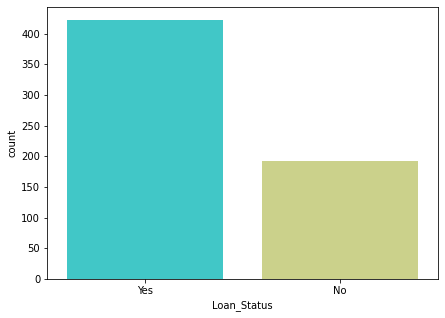

In [1291]:
## Countplot for Target Classes.

plt.figure(figsize=(7,5))
sb.countplot(train['Loan_Status'],palette='rainbow')
plt.xticks([0,1],['Yes','No'])

### Observations:
    - Imbalanced Classes observed.
    - WE can oversample for EDA Purposes for better vizualiation insights.

#### PERFORMING OVER SAMPLING TO MAKE TARGET CLASSES BALANCED OF TARGET CLASSES TO GET BETTER VISUALIZATION INSIGHTS

In [1292]:
# importing overRampler
from imblearn.over_sampling import RandomOverSampler

In [1293]:
rus = RandomOverSampler(random_state=0)

In [1294]:
x_over,y_over = rus.fit_resample(train.drop('Loan_Status',axis=1),train['Loan_Status'])

#### VIZUALIZATION OF BALANCED CLASSES AFTER OVERSAMPLING

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

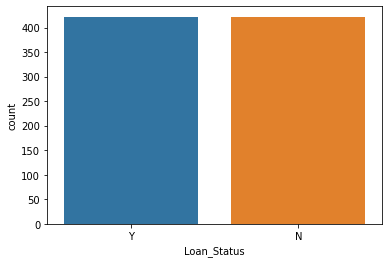

In [1295]:
sb.countplot(y_over)

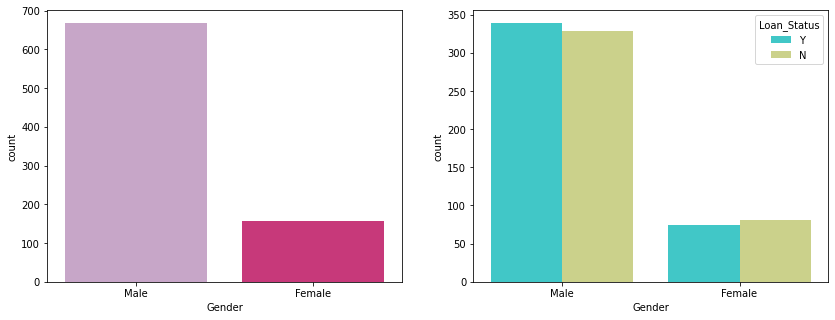

In [1296]:
###count plot of Gender categroy and w.r.t to Target Variable
fig,ax =plt.subplots(1,2, figsize=(14,5))

sb.countplot(x_over['Gender'], ax=ax[0],palette='PuRd')
sb.countplot(x_over['Gender'],hue=y_over, ax=ax[1],palette='rainbow')

fig.show()

#### OBSERVATIONS:
    --- Male count is higher than Female.
    ---  Loan_Status has no major effect by gender, as both counts in Loan Status is Approximately same.

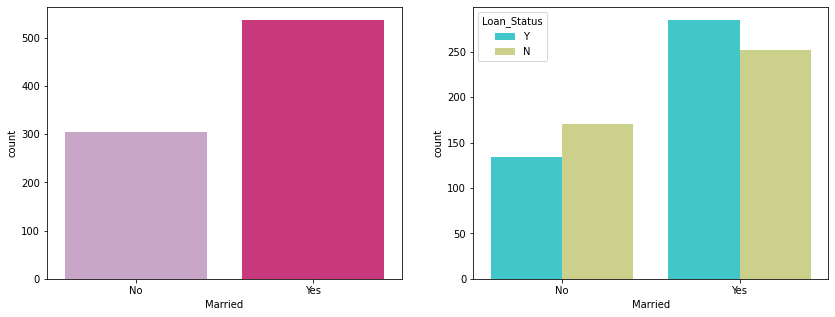

In [1297]:
###count plot of Married categroy and w.r.t to Target Variable

fig,ax =plt.subplots(1,2, figsize=(14,5))

sb.countplot(x_over['Married'], ax=ax[0],palette='PuRd')
sb.countplot(x_over['Married'],hue=y_over, ax=ax[1],palette='rainbow')

fig.show()

#### OBSERVATIONS:
    - MArried Couples applicants are higher than non-Married.
    - Married Applicants have higher probability of Yes Loan_Status, and non Married applicant has higher probability of No Loan _Status

In [1298]:
# creating a target variable into numberic to plot violinplots and kdeplots

y_num = y_over.apply(lambda x: 1 if x=='Y' else 0 )

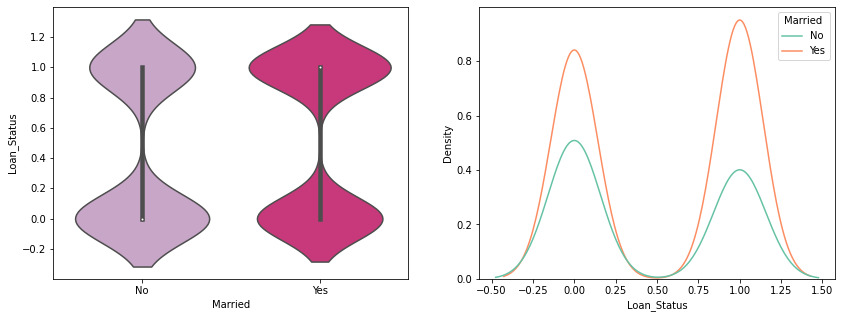

In [1299]:
#violinplot and kde plot to see distribution of Married and w.r.t to Loan_Status

fig,ax =plt.subplots(1,2, figsize=(14,5))

sb.violinplot(x_over['Married'],y_num, ax=ax[0],palette='PuRd')
sb.kdeplot(y_num,hue=x_over['Married'], ax=ax[1],palette='Set2')

fig.show()

#sb.violinplot(x_over['Married'],y_over,)

#### OBSERVATIONS:
    - as WE BAR THE COUNT PLOTS, voilin plot also suggest that married applicants are higher in Loan Status Yes. And Non Married are higher in No .
    
    - Correlation between Married and Loan Status Observed, we can see more in correlation table.

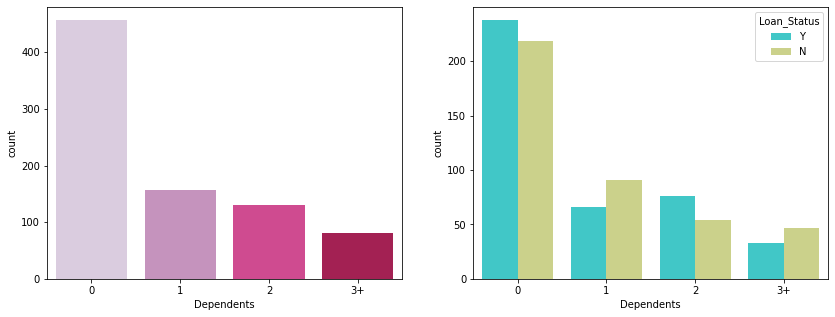

In [1300]:
###count plot of Dependants categroy and w.r.t to Target Variable
fig,ax =plt.subplots(1,2, figsize=(14,5))

sb.countplot(x_over['Dependents'], ax=ax[0],palette='PuRd')
sb.countplot(x_over['Dependents'],hue=y_over, ax=ax[1],palette='rainbow')

fig.show()

### OBSERVATIONS:
    - most Applicants are with zero Dependants, and  no of dependants 1,2,3  we can combine them in one Gruop as 1+ dependants to get more information from this features. as Dependents YES/ No rather than no of Dependants.
    - AS not not much corelation is seen in no of dependatns as in few categories (Random) probabiltiy of Yes loan is high and in other No loan status probability is high.

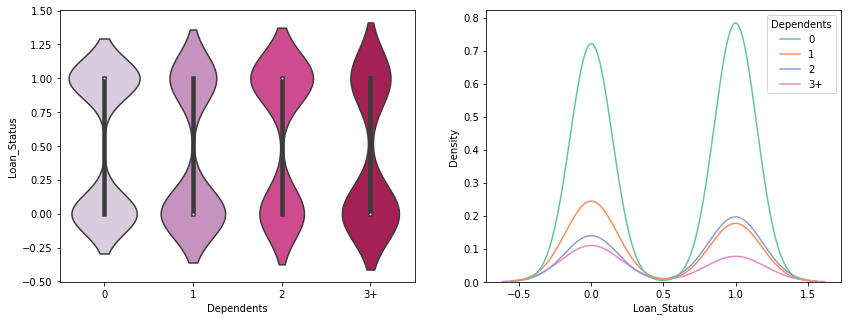

In [1301]:
#violinplot and kde plot to see distribution of Dependants and w.r.t to Loan_Status

fig,ax =plt.subplots(1,2, figsize=(14,5))

sb.violinplot(x_over['Dependents'],y_num, ax=ax[0],palette='PuRd')
sb.kdeplot(y_num,hue=x_over['Dependents'], ax=ax[1],palette='Set2')

fig.show()

#sb.violinplot(x_over['Married'],y_over,)

#### OBSERVATIONS:
    - As we observe the KdePlot, few category have probability of Yes Loan_Status and Few to No loan_Status, no a regular patter.

**CREATING A NEW FEATURE WITH DEPENDANTS : YES/ No , Clubbing all the categories where dependants are 1,2,3+ as to make the categories balanced and to get more information as present Dependants Features doesnot show much correlation.**

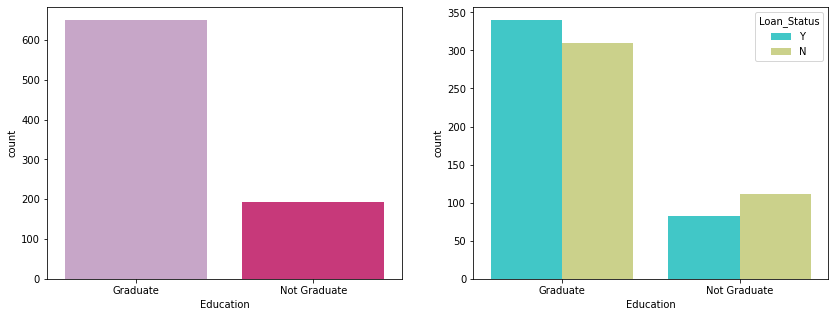

In [1302]:
### LOAN STATUS 0 = NO , 1 = YES
#count plot for Education and w.r.t to Loan_Status

fig,ax =plt.subplots(1,2, figsize=(14,5))
sb.countplot(x_over['Education'], ax=ax[0],palette='PuRd')
sb.countplot(x_over['Education'],hue=y_over, ax=ax[1],palette='rainbow')

fig.show()

####  OBSERVATIONS
     - MOSTapplicants with Education with Graduate level.
     - Graduate Education has higher probability with Yes Loan_Status.
     - not Graduate has higher Probability with No Loan_Status.

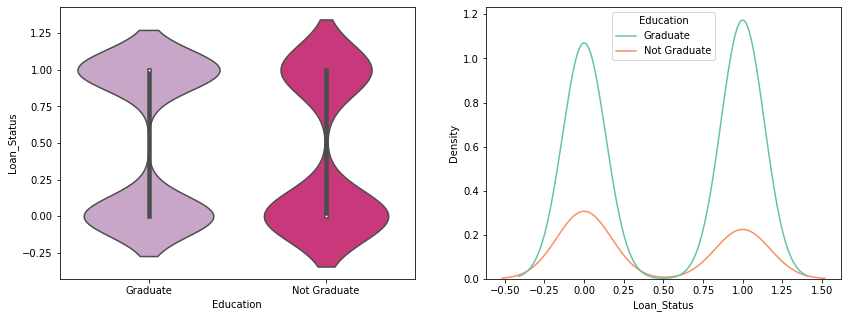

In [1303]:
#violinplot and kde plot to see distribution of Education and w.r.t to Loan_Status
fig,ax =plt.subplots(1,2, figsize=(14,5))

sb.violinplot(x_over['Education'],y_num, ax=ax[0],palette='PuRd')
sb.kdeplot(y_num,hue=x_over['Education'], ax=ax[1],palette='Set2')

fig.show()

#sb.violinplot(x_over['Married'],y_over,)

#### OBSERVATIONS:
    - Graduate count is highin Loan status Yes, and Not Graudate count is higher in Loan Status No.
    - Correlation Observed betweem Eduaction and Loan_Status.

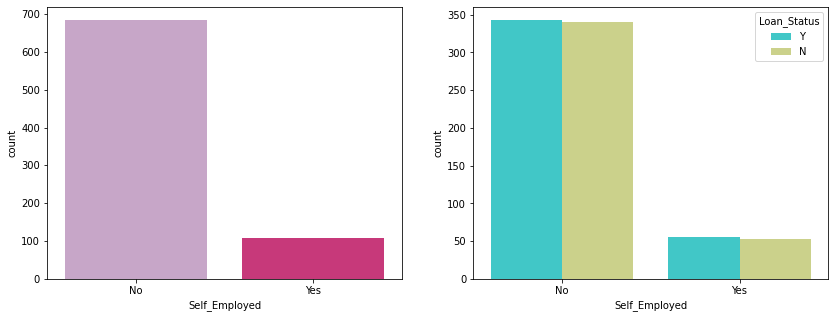

In [1304]:
#count plot for Self Employed and w.r.t to Loan_Status

fig,ax =plt.subplots(1,2, figsize=(14,5))

sb.countplot(x_over['Self_Employed'], ax=ax[0],palette='PuRd')
sb.countplot(x_over['Self_Employed'],hue=y_over, ax=ax[1],palette='rainbow')

fig.show()

#### OBSERVATIONS:
    - SELF_EMPLOYED No has higher count of Applicants.
    - Self employed has Same ccount is Yes/ No Loan_Status.
    - No correlation Observed.

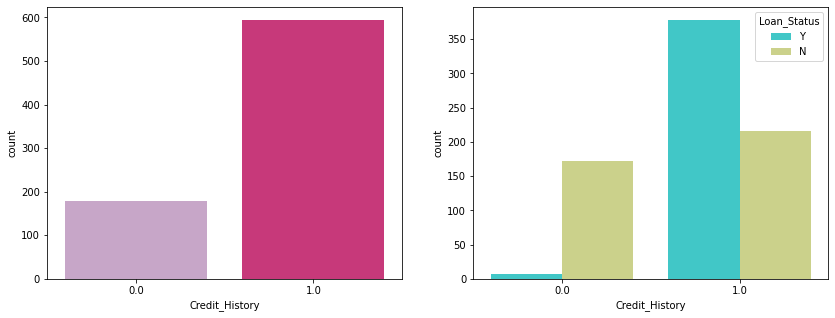

In [1305]:
# count plot for CreditHistory

fig,ax =plt.subplots(1,2, figsize=(14,5))

sb.countplot(x_over['Credit_History'], ax=ax[0],palette='PuRd')
sb.countplot(x_over['Credit_History'],hue=y_over, ax=ax[1],palette='rainbow')

fig.show()

#### OBSERVATION:
    - Credit History with 1.0 are higher in applicants.
    - Credit history with 0 has HIGH probability to have No as Loan_Status.
    - HIGH Correlation Seen between Credit History and Loan_history.
    - High Probability with credit Hiatory 1 to belong in Loan _Status 1.0

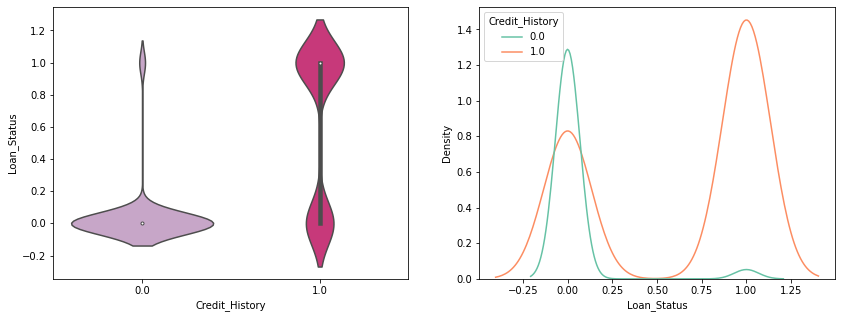

In [1306]:
#violinplot and kde plot to see distribution of Credit_History and w.r.t to Loan_Status
fig,ax =plt.subplots(1,2, figsize=(14,5))

sb.violinplot(x_over['Credit_History'],y_num, ax=ax[0],palette='PuRd')
sb.kdeplot(y_num,hue=x_over['Credit_History'], ax=ax[1],palette='Set2')

fig.show()

#sb.violinplot(x_over['Married'],y_over,)

### OBSERVATIONS:
    - High COrrelation can be observed .
    - Credit History with 0 has more than 95%+ counts in LOAn_Status No.

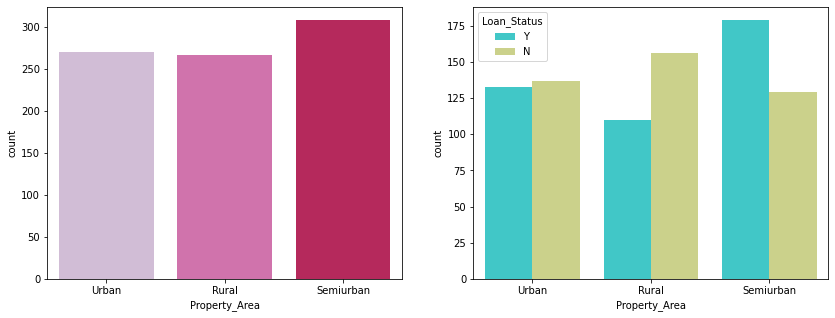

In [1307]:
#Countplot for Property area and w.r.t to Loan_Status
fig,ax =plt.subplots(1,2, figsize=(14,5))

sb.countplot(x_over['Property_Area'], ax=ax[0],palette='PuRd')
sb.countplot(x_over['Property_Area'],hue=y_over, ax=ax[1],palette='rainbow')

fig.show()

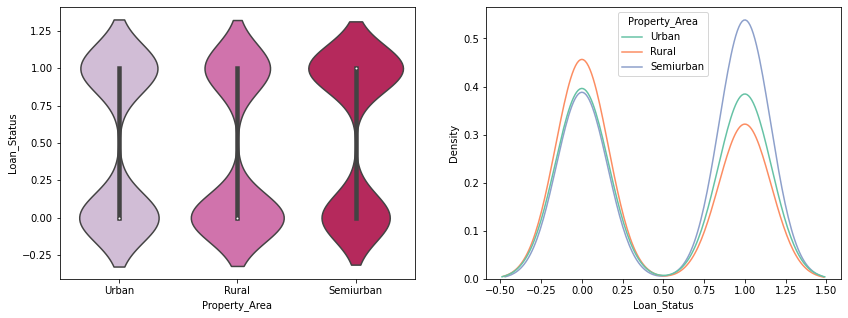

In [1308]:
# Distribution of Data of Property ARea and w.r.t to loan_Status.
fig,ax =plt.subplots(1,2, figsize=(14,5))

sb.violinplot(x_over['Property_Area'],y_num, ax=ax[0],palette='PuRd')
sb.kdeplot(y_num,hue=x_over['Property_Area'], ax=ax[1],palette='Set2')

fig.show()

#sb.violinplot(x_over['Married'],y_over,)

#### OBSERVATIONS:
    - Semi urban has highest  count with loan_Status Yes with compared to other areas.Probability to belong in Yes loan_Status is High.
    - in No loan_Status , Rural probabilty is higher than other areas.

In [1309]:
column_cont = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']

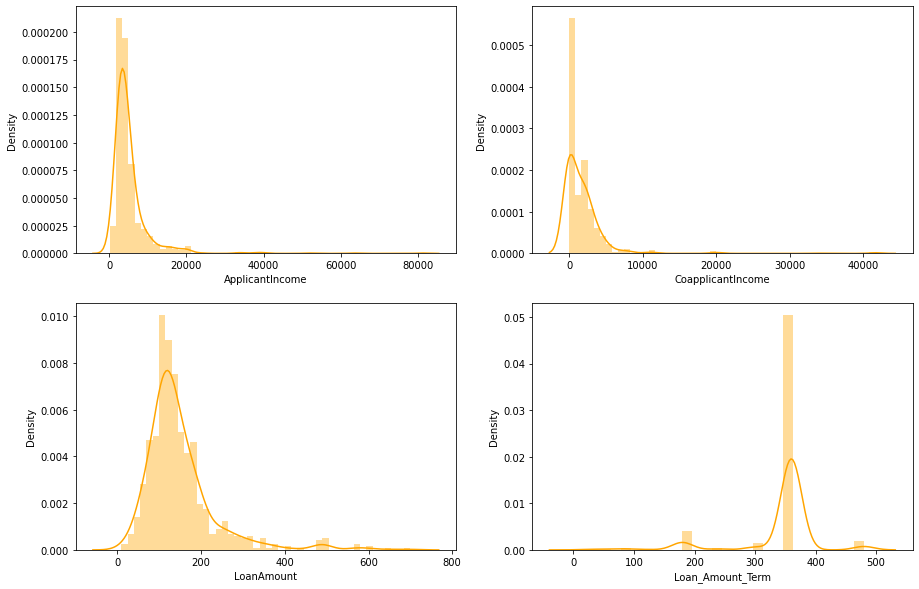

In [1310]:
#Distribution plots of Continous Features to see spread of data.

plt.figure(figsize=(15,10))
k =1
for i in column_cont:
    plt.subplot(2,2,k)
    sb.distplot(x_over[i],color='orange')
    k = k+1

#### Skewness obsered in all the continous features.

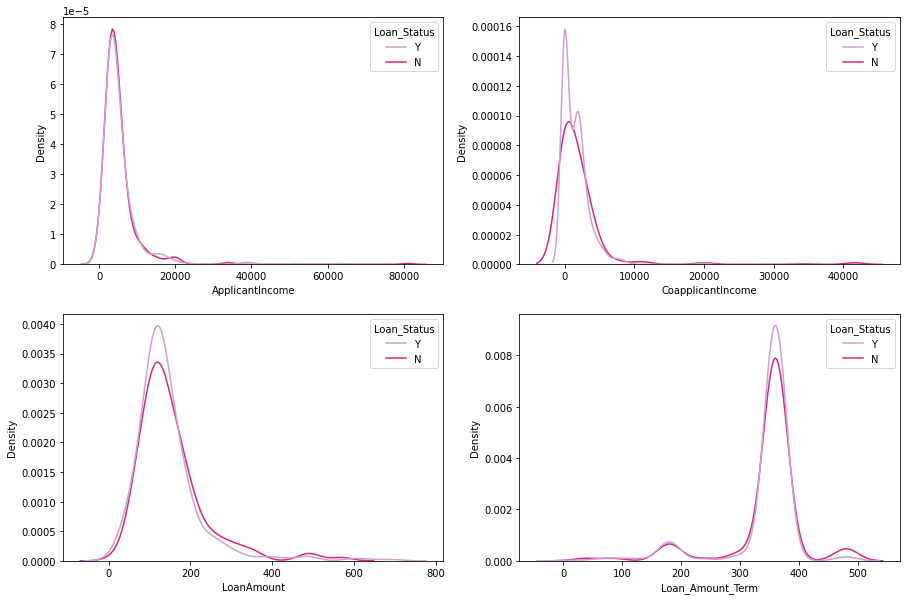

In [1311]:
# KDE PLOT WRT to Loan_Status.

plt.figure(figsize=(15,10))
k =1
for i in column_cont:
    plt.subplot(2,2,k)
    sb.kdeplot(x_over[i],hue= y_over,palette='PuRd' )
    k = k+1

#### OBSERVATIONS:
    - Mean value of loan_amount, loan_Amount term, Coappliant loan amount is lower for No Loan_Status.
    - Applicant loan shows no relevant corelation with Loan_Status.


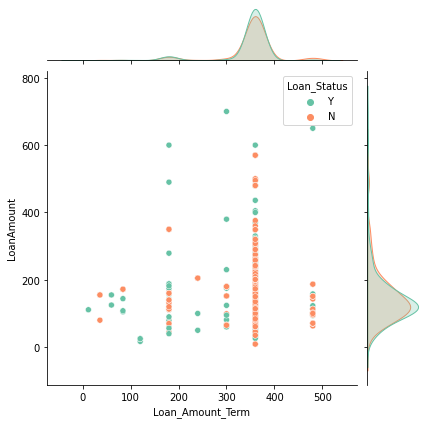

In [1312]:
# Jointplot of Loan_Amuont Term and Loan_Amount w.r.t to Loan_Status
sb.jointplot(x_over['Loan_Amount_Term'],x_over['LoanAmount'],hue=y_over,palette='Set2')

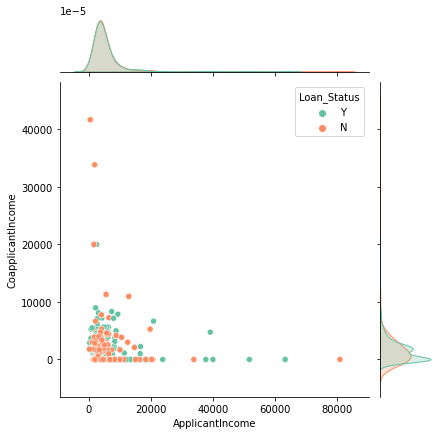

In [1313]:
# Jointplot of Applicants loan amount and coapplicantIncome  w.r.t to Loan_Status
sb.jointplot(x_over['ApplicantIncome'],x_over['CoapplicantIncome'],hue=y_over,palette='Set2')

#### OBSERVATIONS:
    - For high loan_Amount_term ,No Category of loan_Status is high.

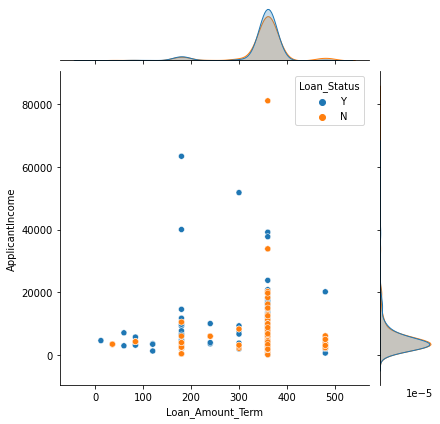

In [1314]:
sb.jointplot(x_over['Loan_Amount_Term'],x_over['ApplicantIncome'],hue=y_over)

#### OBSERVATIONS:
    - high Applicant INcomes, has high probability to bleong in Yes Loan_Status.
    for high Amount Term has high No Loan_Status.

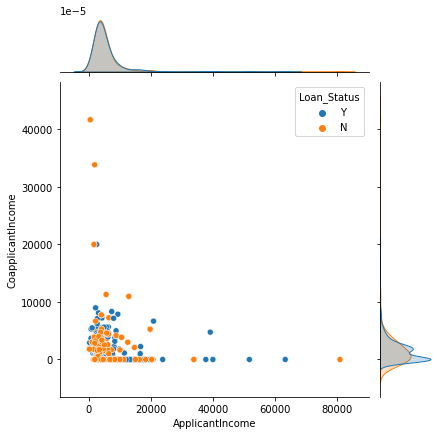

In [1315]:
sb.jointplot(x_over['ApplicantIncome'],x_over['CoapplicantIncome'],hue=y_over)

#### Observations:
    - as the applicant income increases and low values of coappliants, more probability , it belongs to Yes.
    - as the coapplicants income increase, and low value of applicantsIncome, High probabiltiy to No Status.

<AxesSubplot:xlabel='Education', ylabel='LoanAmount'>

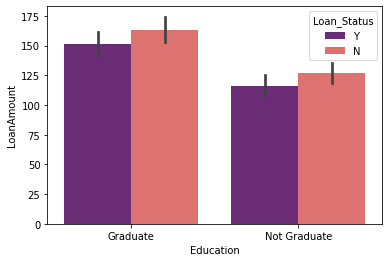

In [1316]:
#Barplot of Education w.r.t to avrage loanAmount taken w.r.t to Loan_Status
sb.barplot(x_over['Education'],x_over['LoanAmount'],hue=y_over,palette='magma')

#### OBSERVATIONS:
    - Graduate education category has higher average Loan_Amuont than not Graduate.
  

<AxesSubplot:xlabel='Dependents', ylabel='LoanAmount'>

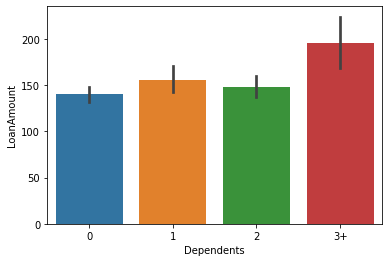

In [1317]:
#Barplot of Dependants w.r.t to average loanAmount taken .
sb.barplot(x_over['Dependents'],x_over['LoanAmount'])

<AxesSubplot:xlabel='Dependents', ylabel='ApplicantIncome'>

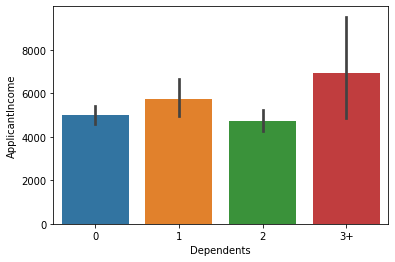

In [1318]:
#Barplot of Education w.r.t to avrage Applicant Income taken.
sb.barplot(x_over['Dependents'],x_over['ApplicantIncome'])

#### With Higher 3+ dpeendaant has average higher Loan_amount and applicant Income.

#### LABEL ENCODING, FILLING MISSING VALUES, FEATURE RE ENGINNERING

        - FILLING THE MISSING VALUES With mode for categorical Data and Median for Continous Features

In [1319]:

(train.isnull()).sum(axis=0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<AxesSubplot:>

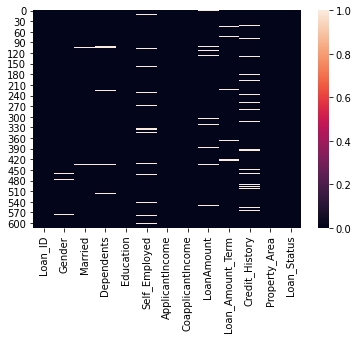

In [1320]:
sb.heatmap(train.isnull())

In [1321]:
#Replacing all the missing vlaues with mode for categorical data and median for contnious Data.


train['Gender'] = train['Gender'].fillna(train['Gender'].mode()[0])
train['Married']= train['Married'].fillna(train['Married'].mode()[0])
train['Dependents']= train['Dependents'].fillna(train['Dependents'].mode()[0])
train['Self_Employed']= train['Self_Employed'].fillna(train['Self_Employed'].mode()[0])
train['Credit_History']= train['Credit_History'].fillna(train['Credit_History'].mode()[0])
train['LoanAmount']= train['LoanAmount'].fillna(train['LoanAmount'].median())
train['Loan_Amount_Term']= train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].median())

In [1322]:
(train.isnull()).sum(axis=0)

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [1323]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [1324]:
category = [ 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed','Credit_History', 'Property_Area', 'Loan_Status']

In [1325]:
# IMPORING label encoder
from sklearn.preprocessing import LabelEncoder

In [1326]:
#Transforming categories ino numerical labels.

for i in category:
    train[i] = LabelEncoder().fit_transform(train[i])

In [1327]:
train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,128.0,360.0,1,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,0,0,2900,0.0,71.0,360.0,1,0,1
610,LP002979,1,1,3,0,0,4106,0.0,40.0,180.0,1,0,1
611,LP002983,1,1,1,0,0,8072,240.0,253.0,360.0,1,2,1
612,LP002984,1,1,2,0,0,7583,0.0,187.0,360.0,1,2,1


In [1328]:
# Creating a new Feature total income = applicants income + coapplicant income
train['TotalIncome'] = train['ApplicantIncome'] + train['CoapplicantIncome']

<AxesSubplot:>

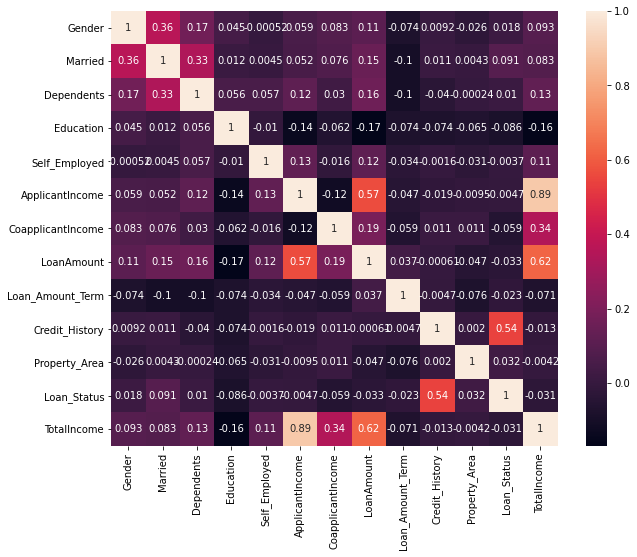

In [1329]:
#Correlation Table.

plt.figure(figsize=(10,8))
sb.heatmap(train.corr(),annot=True)

#### OBSERVATIONS:
    - Loan Status has highest correlation with Credit_History.
    - Multi collinearity present between features. due to which Naive bayes, KNN , Logistic Regression might get effected.

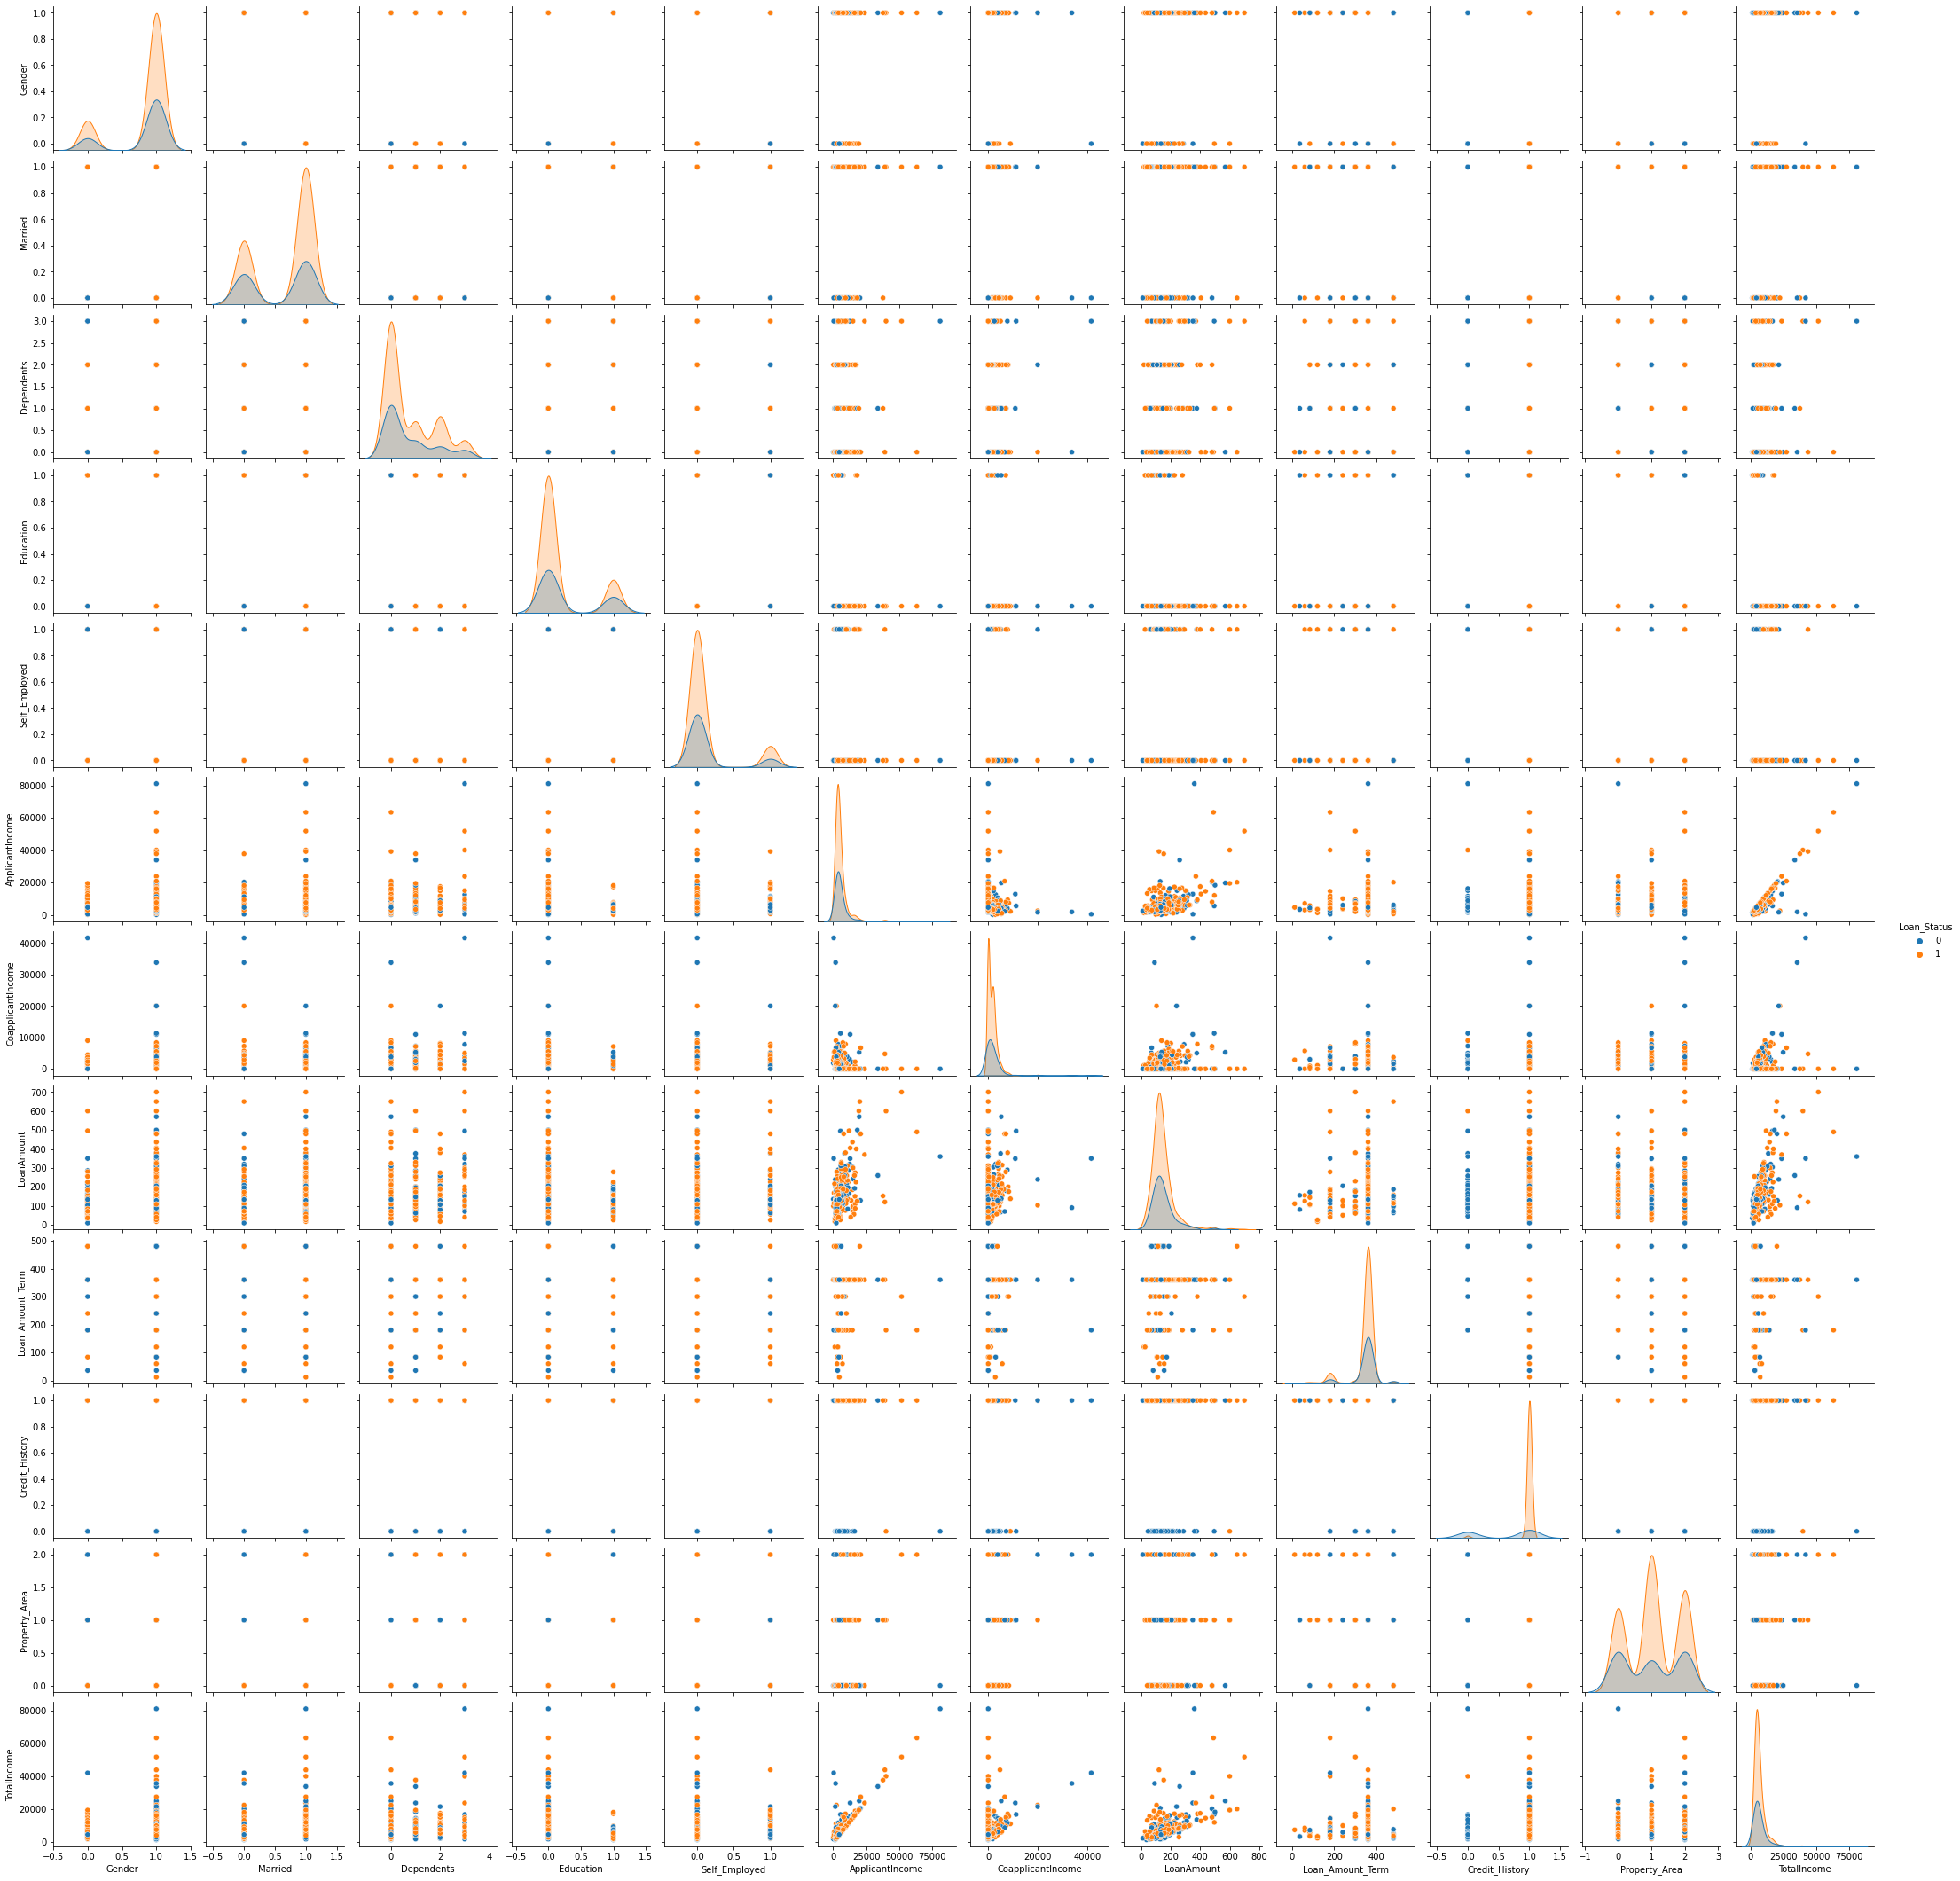

In [1330]:
sb.pairplot(train,hue='Loan_Status')

#### DATA CLEANING: 
    - Outlier Detection
    - If outliers Present, Outlier Treatment with ZSCORE METHOD.
    - CHECK For Skewness, If Skewness present, Transformation of Data.
    - Standardizing/scaling the Data.

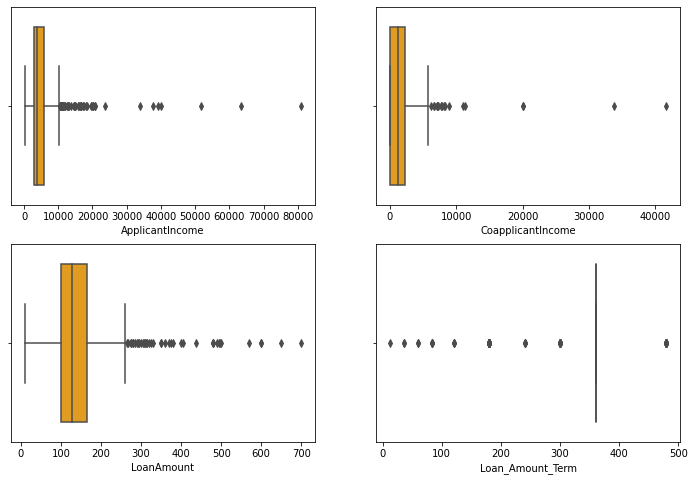

In [1331]:
#boxplots to check outliers

plt.figure(figsize=(12,8))
k =1
for i in column_cont:
    plt.subplot(2,2,k)
    sb.boxplot(train[i],color='orange')
    k = k+1

In [1332]:
from scipy.stats import zscore


In [1333]:
x = train.drop('Loan_ID',axis=1)

In [1334]:
zscores  = np.abs(zscore(x))

In [1335]:
len(np.where(zscores>3)[0])

51

In [1336]:
x.shape

(614, 13)

In [1337]:
x = x[(zscores<3).all(axis=1)]

In [1338]:
x.shape

(577, 13)

#### LOSS of DAta observed 6%

In [1339]:
x.skew()

Gender              -1.622920
Married             -0.630211
Dependents           1.052106
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      2.148522
CoapplicantIncome    1.350517
LoanAmount           1.151525
Loan_Amount_Term    -2.098806
Credit_History      -1.976043
Property_Area       -0.055332
Loan_Status         -0.822635
TotalIncome          1.681856
dtype: float64

#### Skewness present still in continous variables, loan_amount_term, loan_Amount, ApplicantIncome, Coapplicantincome.


#### USING POWER-TRANSFORM OF CONTNOUS FEATURES TO REDUCE SKEWNESS

In [1340]:
from sklearn.preprocessing import PowerTransformer

In [1341]:
column_cont.append('TotalIncome')

In [1342]:
# tranforming continous features.
x[column_cont] = PowerTransformer().fit_transform(x[column_cont])

In [1343]:
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,1,0,0,0,0,0.681780,-1.122446,0.000771,0.130788,1,2,1,0.196237
1,1,1,1,0,0,0.234783,0.744117,0.000771,0.130788,1,0,0,0.285858
2,1,1,0,0,1,-0.527201,-1.122446,-1.437336,0.130788,1,2,1,-1.405629
3,1,1,0,1,0,-0.791972,0.895786,-0.153545,0.130788,1,2,1,-0.185746
4,1,0,0,0,0,0.728848,-1.122446,0.238260,0.130788,1,2,1,0.252679
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,-0.587375,-1.122446,-1.293791,0.130788,1,0,1,-1.493667
610,1,1,3,0,0,0.035386,-1.122446,-2.332692,-2.562700,1,0,1,-0.622195
611,1,1,1,0,0,1.281658,0.173344,1.845015,0.130788,1,2,1,0.946187
612,1,1,2,0,0,1.164426,-1.122446,0.976055,0.130788,1,2,1,0.756080


In [1344]:
y = x['Loan_Status']

In [1345]:
x.drop(['Loan_Status'],axis=1,inplace=True)

In [1346]:
x.skew()

Gender              -1.622920
Married             -0.630211
Dependents           1.052106
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      0.027981
CoapplicantIncome   -0.191876
LoanAmount           0.048425
Loan_Amount_Term     0.727533
Credit_History      -1.976043
Property_Area       -0.055332
TotalIncome         -0.002577
dtype: float64

#### SKEWNESS reduced .

### PCA ENGINEERING
    - understanding how many fetures needed to predict the Target Variable.

In [1347]:
from sklearn.decomposition import PCA

In [1348]:
pca = PCA()
pca.fit(x,y)

PCA()

In [1349]:
pca.explained_variance_ratio_

array([0.30783828, 0.17825253, 0.14513671, 0.12652026, 0.08269019,
       0.05803519, 0.02517201, 0.02261891, 0.0167075 , 0.01464057,
       0.01395804, 0.00842981])

<BarContainer object of 12 artists>

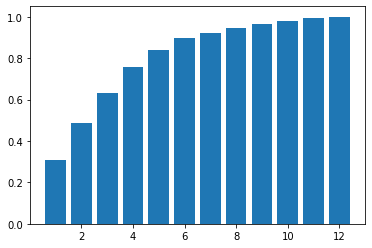

In [1350]:
plt.bar(range(1,13),np.cumsum(pca.explained_variance_ratio_))

#### observation:
    AS WE SEE WE NEED ALL THE ELEMENTS FOR PREDICTION OF lOAN_STATUS, REDUCING FEATURES WILL RESULT IN CONSIDERABLE AMOUNT OF INFORMATION LOSS EFFECTING THE PERFORMANCE OF MODEL.

### DATA MODELING

In [1391]:
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

import scikitplot as skplt
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import roc_auc_score,roc_curve,f1_score,recall_score,precision_score

#### PERFORMING OVERSAMPLING OF DATA AS IMBALANCED CLASSES MIGHT CREATE BIASSNESS TOWARDS 1 CLASS

In [1392]:
#oversampling to create balanced classes data to reduced biassed results towards 1 target class.
X_over, Y_over = SMOTE().fit_resample(x,y)

In [1393]:
#function to find best random state for any model

def random_state_func(model):
    randomstate = 0
    max_score = 0
    
    for i in range(1,50):
        x_train,x_test,y_train,y_test = train_test_split(X_over,Y_over,test_size=.30,random_state=i)
        model.fit(x_train,y_train)
        pred = model.predict(x_test)
        score = accuracy_score(y_test,pred)    
        if(score>max_score):
            max_score = score
            randomstate  = i
    return(randomstate)

#### DATA MODELING:
    - WE will use F1-Score apaprt from ROC_AUC SCORE for evaluating the  model as classes are imbalanced, we need to check if there is any biassness present for any TARGET CLASS, WE will also check precision Score and Recall_Score.

In [1394]:
cv_scores = []
auc_roc_scores = []
acc_scores = []
f1_scores = []

In [1395]:
# Method to for algorithm prediction for any model.

def model_predict(model,randomstate):
    x_train,x_test,y_train,y_test = train_test_split(X_over,Y_over,test_size=.33,random_state=randomstate)
    model.fit(x_train,y_train)
    predictions = model.predict(x_test)
    pred_proba = model.predict_proba(x_test)[:,1]
    fpr,tpr,threshold = roc_curve(y_test,pred_proba)
    cv_score = np.mean(cross_val_score(model,X_over,Y_over,cv=5,scoring='accuracy'))
     
    print('------------',model,'--------------')
    print(' Accuracy Score         : ', accuracy_score(y_test,predictions))
    print('ROC AUC Score           : ', roc_auc_score(y_test,pred_proba))
    print('Cross Validation Score  : ',cv_score)
    print('F1 Score                :',f1_score(y_test,predictions))
    print('Precision Score                :',precision_score(y_test,predictions))
    print('Recall Score                :',recall_score(y_test,predictions))
   
    
    
    print(classification_report(y_test,predictions))
    acc_scores.append(accuracy_score(y_test,predictions))
    cv_scores.append(cv_score)
    auc_roc_scores.append(roc_auc_score(y_test,pred_proba))
    f1_scores.append(f1_score(y_test,predictions))
    
    plt.figure(figsize=(8,5))
    plt.plot(fpr,tpr)
    plt.ylabel('Sensitivity')
    plt.xlabel('1 - Specificity')
    leg = 'AUC SCORE:'+ str(roc_auc_score(y_test,pred_proba))
    plt.legend( [leg],loc= 10)
    
    
    plt.figure()
    skplt.metrics.plot_confusion_matrix(y_test,predictions)
    
    

#### LOGISTIC REGRESSION

------------ LogisticRegression() --------------
 Accuracy Score         :  0.7984790874524715
ROC AUC Score           :  0.8607924921793535
Cross Validation Score  :  0.771430817610063
F1 Score                : 0.8262295081967213
Precision Score                : 0.75
Recall Score                : 0.9197080291970803
              precision    recall  f1-score   support

           0       0.88      0.67      0.76       126
           1       0.75      0.92      0.83       137

    accuracy                           0.80       263
   macro avg       0.82      0.79      0.79       263
weighted avg       0.81      0.80      0.79       263



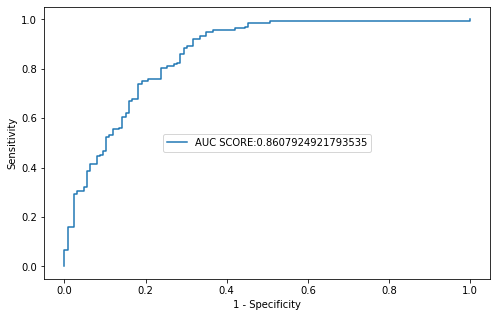

<Figure size 432x288 with 0 Axes>

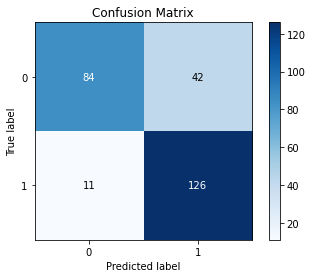

In [1396]:
rs = random_state_func(LogisticRegression())
model_predict(LogisticRegression(),rs)

#### OBSERVATIONS
    - Precision score and Recall score has major difference showing biassness for 1 class. 
    - LOgistic Regression might get effecting with Multicollinearity.
    

#### SVC

------------ SVC(probability=True) --------------
 Accuracy Score         :  0.7946768060836502
ROC AUC Score           :  0.8363246873552572
Cross Validation Score  :  0.7663993710691823
F1 Score                : 0.8235294117647058
Precision Score                : 0.7411764705882353
Recall Score                : 0.9264705882352942
              precision    recall  f1-score   support

           0       0.89      0.65      0.75       127
           1       0.74      0.93      0.82       136

    accuracy                           0.79       263
   macro avg       0.82      0.79      0.79       263
weighted avg       0.81      0.79      0.79       263



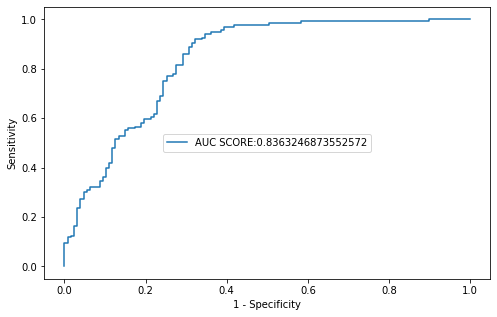

<Figure size 432x288 with 0 Axes>

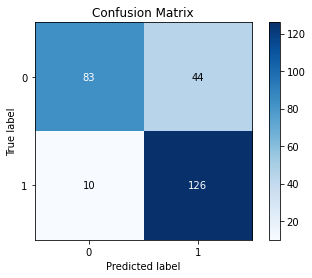

In [1397]:
rs = random_state_func(SVC())
model_predict(SVC(probability=True),rs)

### NAIVE BAYES

In [1398]:
from sklearn.naive_bayes import GaussianNB

------------ GaussianNB() --------------
 Accuracy Score         :  0.7718631178707225
ROC AUC Score           :  0.7896263634253887
Cross Validation Score  :  0.7525943396226416
F1 Score                : 0.8136645962732919
Precision Score                : 0.7158469945355191
Recall Score                : 0.9424460431654677
              precision    recall  f1-score   support

           0       0.90      0.58      0.71       124
           1       0.72      0.94      0.81       139

    accuracy                           0.77       263
   macro avg       0.81      0.76      0.76       263
weighted avg       0.80      0.77      0.76       263



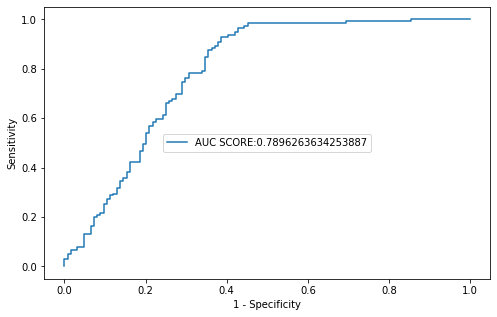

<Figure size 432x288 with 0 Axes>

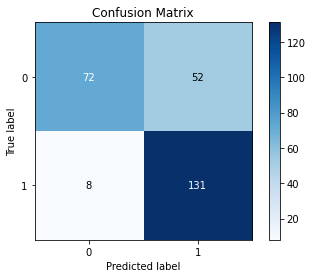

In [1399]:
rs = random_state_func(GaussianNB())
model_predict(GaussianNB(),rs)

#### DECISION TREE

------------ DecisionTreeClassifier() --------------
 Accuracy Score         :  0.7718631178707225
ROC AUC Score           :  0.7761363636363636
Cross Validation Score  :  0.7512971698113207
F1 Score                : 0.7761194029850746
Precision Score                : 0.832
Recall Score                : 0.7272727272727273
              precision    recall  f1-score   support

           0       0.72      0.82      0.77       120
           1       0.83      0.73      0.78       143

    accuracy                           0.77       263
   macro avg       0.77      0.78      0.77       263
weighted avg       0.78      0.77      0.77       263



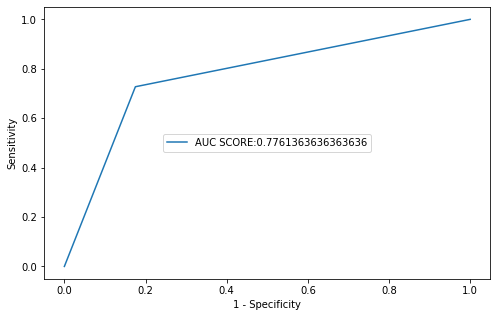

<Figure size 432x288 with 0 Axes>

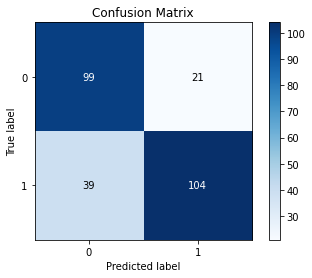

In [1400]:
rs = random_state_func(DecisionTreeClassifier())
model_predict(DecisionTreeClassifier(),rs)

## ENSEMBLING TECHNIQUES

### RANDOM FOREST CLASSIFIER

------------ RandomForestClassifier() --------------
 Accuracy Score         :  0.844106463878327
ROC AUC Score           :  0.9114202898550725
Cross Validation Score  :  0.821682389937107
F1 Score                : 0.8498168498168499
Precision Score                : 0.7837837837837838
Recall Score                : 0.928
              precision    recall  f1-score   support

           0       0.92      0.77      0.84       138
           1       0.78      0.93      0.85       125

    accuracy                           0.84       263
   macro avg       0.85      0.85      0.84       263
weighted avg       0.86      0.84      0.84       263



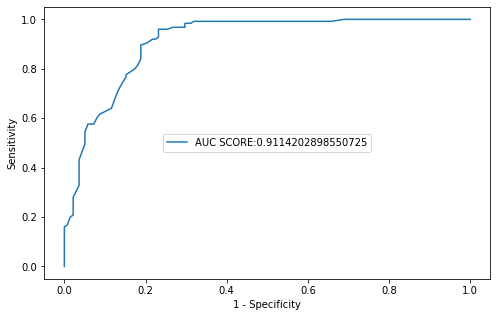

<Figure size 432x288 with 0 Axes>

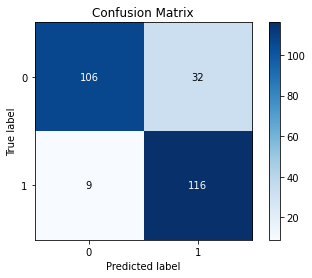

In [1401]:
rs = random_state_func(RandomForestClassifier())
model_predict(RandomForestClassifier(),rs)

### XGBOOST CLASSIFIER

[12:26:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:26:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:26:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:26:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

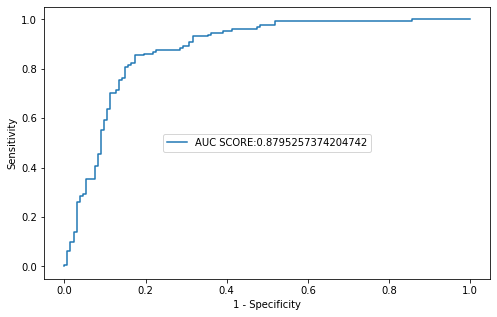

<Figure size 432x288 with 0 Axes>

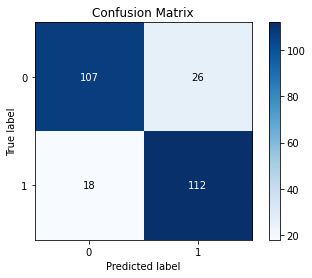

In [1402]:
rs = random_state_func(XGBClassifier())
model_predict(XGBClassifier(),rs)

### LIGHT GBM CLASSIFER

------------ LGBMClassifier() --------------
 Accuracy Score         :  0.7832699619771863
ROC AUC Score           :  0.8704927536231883
Cross Validation Score  :  0.801556603773585
F1 Score                : 0.7896678966789669
Precision Score                : 0.7328767123287672
Recall Score                : 0.856
              precision    recall  f1-score   support

           0       0.85      0.72      0.78       138
           1       0.73      0.86      0.79       125

    accuracy                           0.78       263
   macro avg       0.79      0.79      0.78       263
weighted avg       0.79      0.78      0.78       263



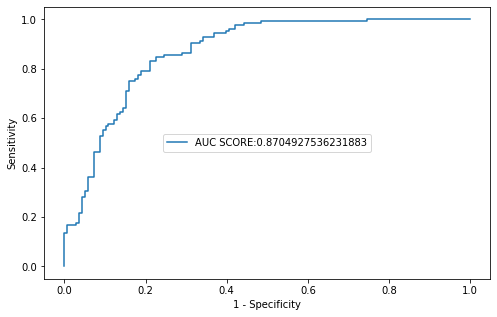

<Figure size 432x288 with 0 Axes>

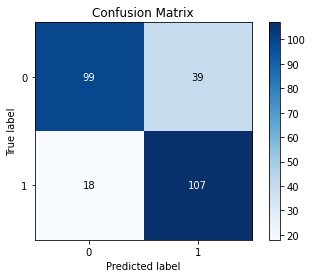

In [1403]:
rs = random_state_func(LGBMClassifier())
model_predict(LGBMClassifier(),rs)

#### ADA BOOST CLASSIFER

------------ AdaBoostClassifier() --------------
 Accuracy Score         :  0.7908745247148289
ROC AUC Score           :  0.8474738675958188
Cross Validation Score  :  0.7576022012578616
F1 Score                : 0.7940074906367042
Precision Score                : 0.7361111111111112
Recall Score                : 0.8617886178861789
              precision    recall  f1-score   support

           0       0.86      0.73      0.79       140
           1       0.74      0.86      0.79       123

    accuracy                           0.79       263
   macro avg       0.80      0.80      0.79       263
weighted avg       0.80      0.79      0.79       263



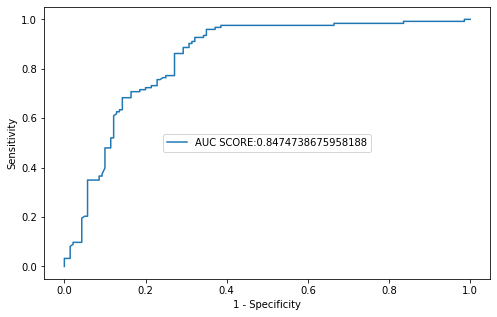

<Figure size 432x288 with 0 Axes>

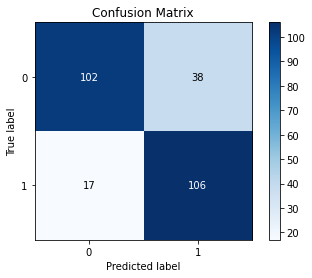

In [1404]:
rs = random_state_func(AdaBoostClassifier())
model_predict(AdaBoostClassifier(),rs)

### GRADIENT BOOSTING CLASSIFER

------------ GradientBoostingClassifier() --------------
 Accuracy Score         :  0.8136882129277566
ROC AUC Score           :  0.8614196459562652
Cross Validation Score  :  0.7915330188679246
F1 Score                : 0.8316151202749141
Precision Score                : 0.7707006369426752
Recall Score                : 0.9029850746268657
              precision    recall  f1-score   support

           0       0.88      0.72      0.79       129
           1       0.77      0.90      0.83       134

    accuracy                           0.81       263
   macro avg       0.82      0.81      0.81       263
weighted avg       0.82      0.81      0.81       263



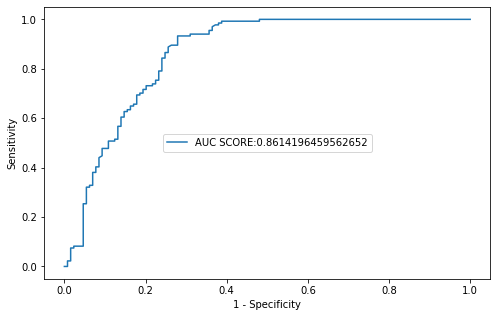

<Figure size 432x288 with 0 Axes>

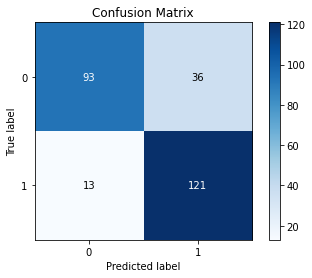

In [1405]:
rs = random_state_func(GradientBoostingClassifier())
model_predict(GradientBoostingClassifier(),rs)

In [1406]:
error = []
for i in range(0,9):
    error.append(np.abs(acc_scores[i] - cv_scores[i]))
    

In [1407]:
table_dict = {
    'ROC AUC SCORE: ':auc_roc_scores,
    'ACCURACY SCORE': acc_scores,
    'CV SCORE': cv_scores,
    'F1 SCORE': f1_scores,
    'Bias/ Error': error
}

In [1408]:
table_model = pd.DataFrame(table_dict,index=['LReg','SVC','NAIVEBAYES','DTC','RF','XGBC','LightGBMC','ADABoost','GB'])

In [1409]:
table_model

,ROC AUC SCORE:,ACCURACY SCORE,CV SCORE,F1 SCORE,Bias/ Error
LReg,0.860792,0.798479,0.771431,0.826230,0.027048
SVC,0.836325,0.794677,0.766399,0.823529,0.028277
NAIVEBAYES,0.789626,0.771863,0.752594,0.813665,0.019269
DTC,0.776136,0.771863,0.751297,0.776119,0.020566
RF,0.911420,0.844106,0.821682,0.849817,0.022424
XGBC,0.879526,0.832700,0.787736,0.835821,0.044964
LightGBMC,0.870493,0.783270,0.801557,0.789668,0.018287
ADABoost,0.847474,0.790875,0.757602,0.794007,0.033272
GB,0.861420,0.813688,0.791533,0.831615,0.022155


#### WE CHOOSE THE MODEL WITH LEAST BIAS: 
    - Model with least Error is DTC then RF, but DTC has lowest accuracy,f1-scores. Choosing the next best least error model : RANDOM FOREST/ LightGBM
    

#### HYPERPARAMETER TUNING with GRidSearchCV RANDOM FOREST 

In [1430]:
params = {
    'n_estimators': [100,150,120,200],
    'criterion': ['gini','entropy'],
    'max_depth': [5,10,15],
    'min_samples_split': [1,2,3],
    
    'max_leaf_nodes':[50,70,80,100],
   
   
    
}
rf = RandomForestClassifier()

In [1431]:
grid = RandomizedSearchCV(rf,params,cv=5,n_iter=50,scoring='accuracy',verbose=2)

In [1432]:
grid.fit(X_over,Y_over)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END criterion=entropy, max_depth=15, max_leaf_nodes=100, min_samples_split=1, n_estimators=200; total time=   0.0s
[CV] END criterion=entropy, max_depth=15, max_leaf_nodes=100, min_samples_split=1, n_estimators=200; total time=   0.0s
[CV] END criterion=entropy, max_depth=15, max_leaf_nodes=100, min_samples_split=1, n_estimators=200; total time=   0.0s
[CV] END criterion=entropy, max_depth=15, max_leaf_nodes=100, min_samples_split=1, n_estimators=200; total time=   0.0s
[CV] END criterion=entropy, max_depth=15, max_leaf_nodes=100, min_samples_split=1, n_estimators=200; total time=   0.0s
[CV] END criterion=gini, max_depth=15, max_leaf_nodes=70, min_samples_split=3, n_estimators=200; total time=   0.2s
[CV] END criterion=gini, max_depth=15, max_leaf_nodes=70, min_samples_split=3, n_estimators=200; total time=   0.2s
[CV] END criterion=gini, max_depth=15, max_leaf_nodes=70, min_samples_split=3, n_estimators=200; total tim

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=50,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [5, 10, 15],
                                        'max_leaf_nodes': [50, 70, 80, 100],
                                        'min_samples_split': [1, 2, 3],
                                        'n_estimators': [100, 150, 120, 200]},
                   scoring='accuracy', verbose=2)

In [1433]:
grid.best_score_,grid.best_estimator_

(0.817940251572327,
 RandomForestClassifier(criterion='entropy', max_depth=15, max_leaf_nodes=100,
                        n_estimators=120))

------------------RANDOM FOREST MODEL---------------------
 Accuracy Score         :  0.8661087866108786
ROC AUC Score           :  0.9370884124982486
Cross Validation Score  :  0.8166666666666668
F1 Score                : 0.8709677419354839
              precision    recall  f1-score   support

           0       0.88      0.85      0.86       117
           1       0.86      0.89      0.87       122

    accuracy                           0.87       239
   macro avg       0.87      0.87      0.87       239
weighted avg       0.87      0.87      0.87       239



<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

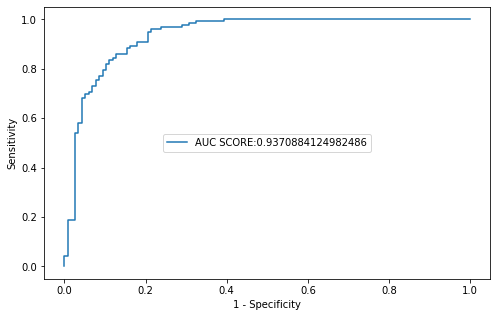

<Figure size 432x288 with 0 Axes>

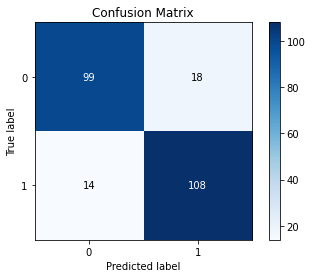

In [1434]:
    rs = random_state_func(RandomForestClassifier())
    x_train,x_test,y_train,y_test = train_test_split(X_over,Y_over,test_size=.30,random_state=rs)
    model =   RandomForestClassifier(criterion='entropy', max_depth=15, max_leaf_nodes=100,
                        n_estimators=120)
    model.fit(x_train,y_train)
    predictions = model.predict(x_test)
    pred_proba = model.predict_proba(x_test)[:,1]
    fpr,tpr,threshold = roc_curve(y_test,pred_proba)
    cv_score = np.mean(cross_val_score(model,X_over,Y_over,cv=5,scoring='accuracy'))
     
    print('------------------RANDOM FOREST MODEL---------------------')
    print(' Accuracy Score         : ', accuracy_score(y_test,predictions))
    print('ROC AUC Score           : ', roc_auc_score(y_test,pred_proba))
    print('Cross Validation Score  : ',cv_score)
    print('F1 Score                :',f1_score(y_test,predictions))
   
    
    
    print(classification_report(y_test,predictions))
    
    
    plt.figure(figsize=(8,5))
    plt.plot(fpr,tpr)
    plt.ylabel('Sensitivity')
    plt.xlabel('1 - Specificity')
    leg = 'AUC SCORE:'+ str(roc_auc_score(y_test,pred_proba))
    plt.legend( [leg],loc= 10)
    
    
    plt.figure()
    skplt.metrics.plot_confusion_matrix(y_test,predictions)
    
    


#### EVALUATING THE FINAL TUNED MODEL:  RANDOM FOREST

------------------RANDOM FOREST MODEL---------------------
 Accuracy Score         :  0.8661087866108786
ROC AUC Score           :  0.9395404231469806
Cross Validation Score  :  0.8242295597484277
F1 Score                : 0.8699186991869918
              precision    recall  f1-score   support

           0       0.87      0.85      0.86       117
           1       0.86      0.88      0.87       122

    accuracy                           0.87       239
   macro avg       0.87      0.87      0.87       239
weighted avg       0.87      0.87      0.87       239



<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

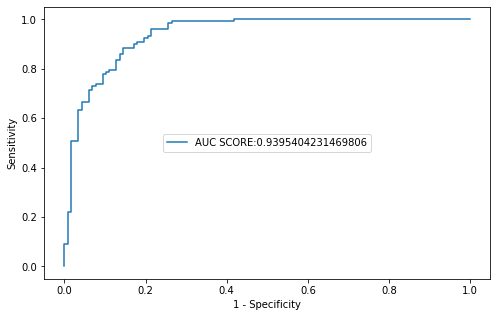

<Figure size 432x288 with 0 Axes>

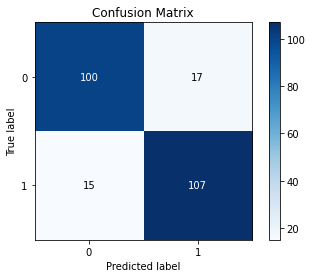

In [1436]:
    rs = random_state_func(RandomForestClassifier())
    x_train,x_test,y_train,y_test = train_test_split(X_over,Y_over,test_size=.30,random_state=rs)
    model =   RandomForestClassifier(criterion='entropy', max_depth=15, max_leaf_nodes=100,
                        n_estimators=120)
    model.fit(x_train,y_train)
    predictions = model.predict(x_test)
    pred_proba = model.predict_proba(x_test)[:,1]
    fpr,tpr,threshold = roc_curve(y_test,pred_proba)
    cv_score = np.mean(cross_val_score(model,X_over,Y_over,cv=5,scoring='accuracy'))
     
    print('------------------RANDOM FOREST MODEL---------------------')
    print(' Accuracy Score         : ', accuracy_score(y_test,predictions))
    print('ROC AUC Score           : ', roc_auc_score(y_test,pred_proba))
    print('Cross Validation Score  : ',cv_score)
    print('F1 Score                :',f1_score(y_test,predictions))
   
    
    
    print(classification_report(y_test,predictions))
    
    
    plt.figure(figsize=(8,5))
    plt.plot(fpr,tpr)
    plt.ylabel('Sensitivity')
    plt.xlabel('1 - Specificity')
    leg = 'AUC SCORE:'+ str(roc_auc_score(y_test,pred_proba))
    plt.legend( [leg],loc= 10)
    
    
    plt.figure()
    skplt.metrics.plot_confusion_matrix(y_test,predictions)
    
    


#### CONCLUSION 
    - Random Forest after hyperparameter tuning giving an accuracy upto .86.6% with ROC AUC Score of .93%.
    - Little biassness is observed as Precision is higher for for loan_status no and Recall Score is higher for Yes Score.
    -After After tuning, baissed predictions have been reduced to a significant level.

#### SAVING AND LAODING THE MODEL:


In [1437]:
import joblib as jb

In [1438]:
jb.dump(model,'loan_pred_rf.pk1')

['loan_pred_rf.pk1']

In [1439]:
jb.load('loan_pred_rf.pk1')

RandomForestClassifier(criterion='entropy', max_depth=15, max_leaf_nodes=100,
                       n_estimators=120)